# Exercises

Do your work for these exercises in a jupyter notebook named `scaling`. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

## Imports

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import wrangle as w
import explore as e
import model as m

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
train,validate,test = w.wrangle_zillow()

Train:		Validate:	Test:
(1284141, 7)	(428047, 7)	(428047, 7)


In [3]:
def preprocess_zillow(train,validate,test):
    encoded_dfs = []
    for df in [train,validate,test]:
        df_encoded_cols = pd.get_dummies(df.county).astype(int)
        df = pd.concat([df,df_encoded_cols],axis=1).drop(columns='county')
        encoded_dfs.append(df)
    
    X_and_y_dfs = []
    for df in encoded_dfs:
        X_and_y_dfs.append(df.drop(columns='property_value'))
        X_and_y_dfs.append(df.property_value)
        
    return X_and_y_dfs

In [4]:
X_train,y_train,X_validate,y_validate,X_test,y_test = preprocess_zillow(train,validate,test)

In [5]:
X_train

,bed_count,bath_count,area,year_built,tax_amount,Los Angeles,Orange,Ventura
993671,4,3.0,1956,1955,3554.38,0,1,0
1191413,3,2.0,1929,1929,5486.56,1,0,0
1131915,3,2.0,1188,1952,1073.84,0,1,0
1998279,2,1.0,1133,1950,847.60,0,1,0
1417050,4,4.0,3033,2011,5534.04,1,0,0
...,...,...,...,...,...,...,...,...
1928393,4,3.0,1976,1970,6546.68,1,0,0
516098,3,2.0,1988,1965,3226.18,1,0,0
413602,4,2.0,1773,1977,4046.07,1,0,0
1010217,3,2.0,1496,1977,5558.30,1,0,0


In [6]:
pd.DataFrame(y_train)

,property_value
993671,293741
1191413,438685
1131915,61191
1998279,44967
1417050,423764
...,...
1928393,483594
516098,212339
413602,339172
1010217,443826


Text(0.5, 1.0, 'Scaled')

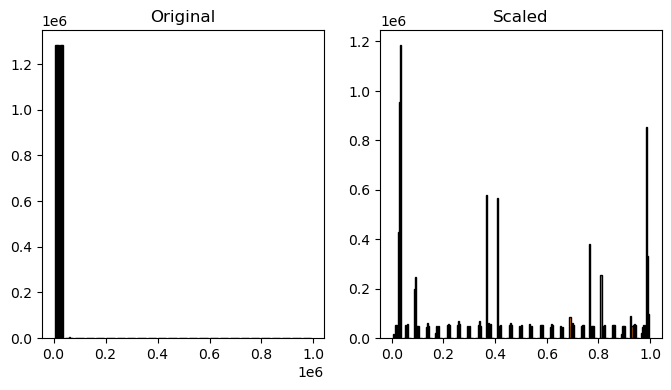

In [31]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

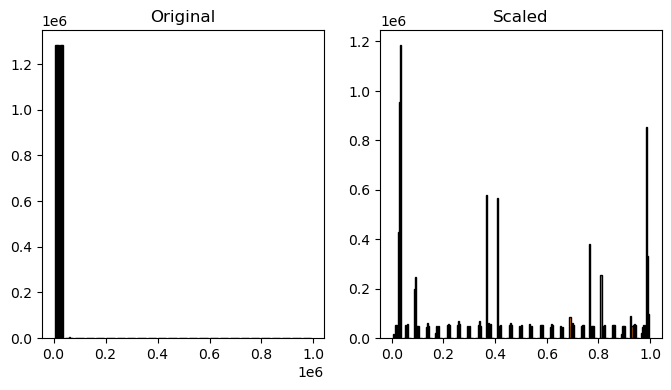

In [32]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

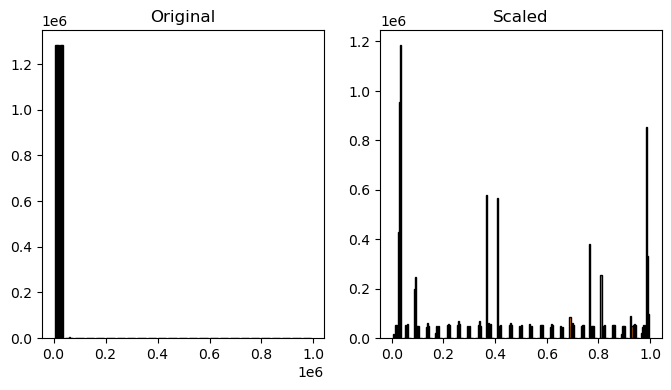

In [33]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Text(0.5, 1.0, 'Scaled')

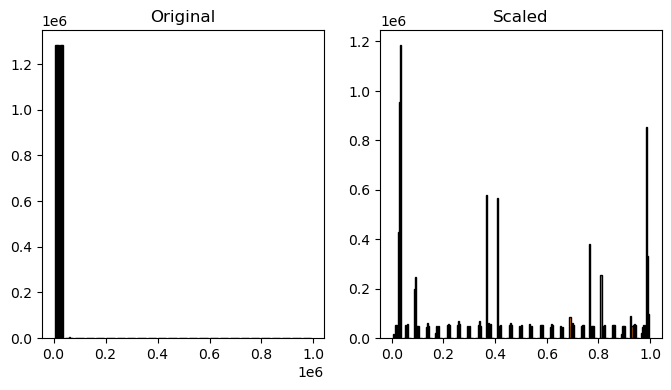

In [34]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

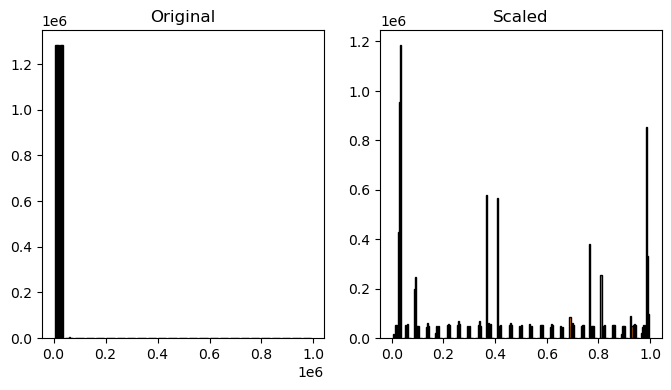

In [35]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

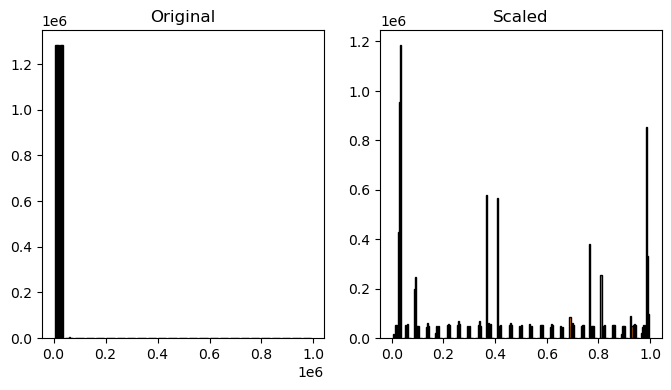

In [36]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Text(0.5, 1.0, 'Scaled')

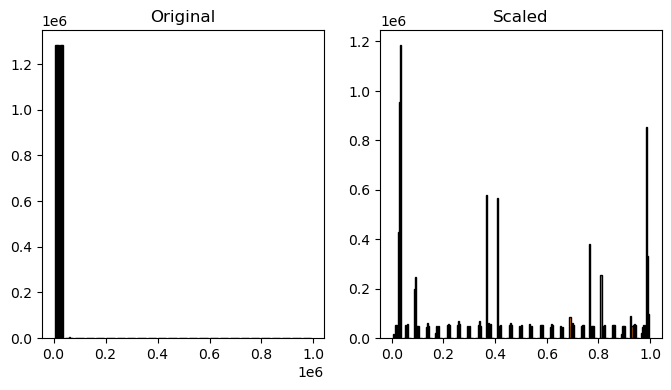

In [37]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'Scaled')

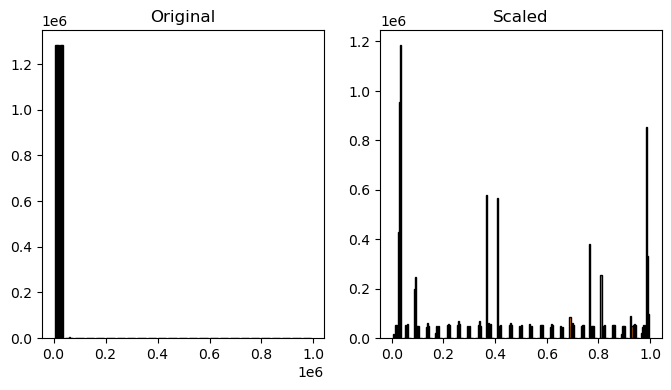

In [38]:
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit_transform(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [2]:
train,validate,test = w.wrangle_zillow()

Train:		Validate:	Test:
(1284141, 7)	(428047, 7)	(428047, 7)


In [47]:
train

,bed_count,bath_count,area,property_value,year_built,tax_amount,county
993671,4,3.0,1956,293741,1955,3554.38,Orange
1191413,3,2.0,1929,438685,1929,5486.56,Los Angeles
1131915,3,2.0,1188,61191,1952,1073.84,Orange
1998279,2,1.0,1133,44967,1950,847.60,Orange
1417050,4,4.0,3033,423764,2011,5534.04,Los Angeles
...,...,...,...,...,...,...,...
1928393,4,3.0,1976,483594,1970,6546.68,Los Angeles
516098,3,2.0,1988,212339,1965,3226.18,Los Angeles
413602,4,2.0,1773,339172,1977,4046.07,Los Angeles
1010217,3,2.0,1496,443826,1977,5558.30,Los Angeles


In [48]:
def preprocess_zillow(train,validate,test):
    encoded_dfs = []
    for df in [train,validate,test]:
        df_encoded_cols = pd.get_dummies(df.county).astype(int)
        df = pd.concat([df,df_encoded_cols],axis=1).drop(columns='county')
        encoded_dfs.append(df)
    print(f'Train:\t\tValidate:\tTest:')
    print(f'{encoded_dfs[0].shape}\t{encoded_dfs[1].shape}\t{encoded_dfs[2].shape}')    
        
    return encoded_dfs

In [49]:
train,validate,test = preprocess_zillow(train,validate,test)

Train:		Validate:	Test:
(1284141, 9)	(428047, 9)	(428047, 9)


In [51]:
train

,bed_count,bath_count,area,property_value,year_built,tax_amount,Los Angeles,Orange,Ventura
993671,4,3.0,1956,293741,1955,3554.38,0,1,0
1191413,3,2.0,1929,438685,1929,5486.56,1,0,0
1131915,3,2.0,1188,61191,1952,1073.84,0,1,0
1998279,2,1.0,1133,44967,1950,847.60,0,1,0
1417050,4,4.0,3033,423764,2011,5534.04,1,0,0
...,...,...,...,...,...,...,...,...,...
1928393,4,3.0,1976,483594,1970,6546.68,1,0,0
516098,3,2.0,1988,212339,1965,3226.18,1,0,0
413602,4,2.0,1773,339172,1977,4046.07,1,0,0
1010217,3,2.0,1496,443826,1977,5558.30,1,0,0


In [79]:
def scale_zillow(train,validate,test):
    X_dfs = []
    for df in [train,validate,test]:
        X_dfs.append(df.drop(columns='property_value'))
        # X_and_y_dfs.append(df.property_value)
    
    scaled_dfs = []
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler = scaler.fit(X_dfs[0])
    for df in X_dfs:
        df = scaler.transform(df)
        scaled_dfs.append(df)
    
    for df in [train,validate,test]:
        # scaled_dfs.append(df.drop(columns='property_value'))
        scaled_dfs.append(df.property_value)
    
    dfs = []
    for df in scaled_dfs:
        dfs.append(pd.DataFrame(df))
    
    return dfs

In [80]:
X_train,X_validate,X_test,y_train,y_validate,y_test = scale_zillow(train,validate,test)

In [85]:
y_train

,property_value
993671,293741
1191413,438685
1131915,61191
1998279,44967
1417050,423764
...,...
1928393,483594
516098,212339
413602,339172
1010217,443826


In [3]:
train,validate,test = w.wrangle_zillow()

Train:		(1284141, 7)
Validate:	(428047, 7)
Test:		(428047, 7)


In [4]:
X_train,X_validate,X_test,y_train,y_validate,y_test = m.preprocess_and_scale_zillow(train,validate,test)

X_train: 	(1284141, 8)
y_train: 	(1284141, 1)

X_validate: 	(428047, 8)
y_validate: 	(428047, 1)

X_test: 	(428047, 8)
y_test: 	(428047, 1)
